In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [3]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [4]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': False
    }
)

env = gym.make('FrozenLake-v3')

In [7]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
n_episodes = 2000

r_list = []
for i in range(n_episodes):
    state = env.reset()
    r_all = 0
    done = False
    
    while not done:
        action = rargmax(Q[state, :])
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + np.max(Q[new_state, :])
        r_all += reward
        state = new_state
    r_list.append(r_all)

Success rate: 0.9595
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


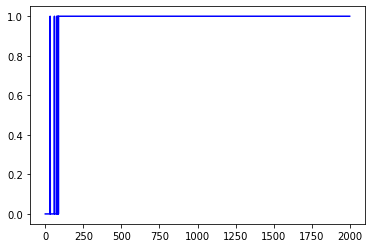

In [9]:
print(f'Success rate: {sum(r_list)/n_episodes}')
print(Q)
plt.plot(range(len(r_list)), r_list, color='blue')
plt.show()